CODE BLOCK: 1


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)



Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/S7/"

/content/drive/MyDrive/S7


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import utils as ai_utils
import model_2 as model2
import model_3 as model3

In [ ]:
!ls

Arun_Kutty_Assignment_7.ipynb  model_2.py     model_3.py   utils.ipynb
model_2.ipynb		       model_3.ipynb  __pycache__  utils.py


CODE BLOCK: 2


In [ ]:
dir(ai_utils)

['F',
 'GetCorrectPredCount',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'create_dataloader',
 'datasets',
 'get_device',
 'get_optimizer',
 'get_scheduler',
 'load_data',
 'nn',
 'optim',
 'plot_accuracy_loss',
 'plot_data',
 'plt',
 'run_epochs',
 'test',
 'test_acc',
 'test_data_transformation',
 'test_incorrect_pred',
 'test_losses',
 'torch',
 'tqdm',
 'train',
 'train_acc',
 'train_data_transformation',
 'train_losses',
 'transforms']

In [ ]:
dir(model2)

['F',
 'Net2',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'dropout_value',
 'nn']

In [ ]:
dir(model3)

['F',
 'Net3',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'nn']

In [ ]:
ai_utils.get_device()

device(type='cuda')

CODE BLOCK: 3


In [ ]:
train_transforms = ai_utils.train_data_transformation()
test_transforms = ai_utils.test_data_transformation()

CODE BLOCK: 4


In [ ]:
train_data = ai_utils.load_data('../data', isTrainable=True, isDownloadable=True, typeTransformation=train_transforms)
test_data = ai_utils.load_data('../data', isTrainable=False, isDownloadable=True, typeTransformation=test_transforms)

CODE BLOCK: 5


In [ ]:
batch_size = 128

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = ai_utils.create_dataloader(test_data,kwargs)
train_loader = ai_utils.create_dataloader(train_data,kwargs)

len(train_loader)

469

CODE BLOCK: 6


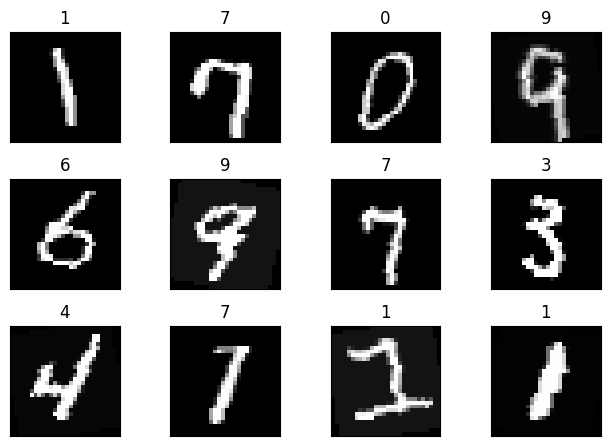

In [ ]:
ai_utils.plot_data(train_loader)

CODE BLOCK: 7


In [ ]:
!pip install torchsummary


In [ ]:
from torchsummary import summary

In [ ]:
device = ai_utils.get_device()
model = model3.Net3().to(device)
# model2 = Net2().to(device)

summary(model, input_size=(1, 28, 28))
# summary(model2,input_size=(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           1,152
              ReLU-6           [-1, 16, 24, 24]               0
       BatchNorm2d-7           [-1, 16, 24, 24]              32
           Dropout-8           [-1, 16, 24, 24]               0
         MaxPool2d-9           [-1, 16, 12, 12]               0
           Conv2d-10            [-1, 8, 12, 12]             128
             ReLU-11            [-1, 8, 12, 12]               0
      BatchNorm2d-12            [-1, 8, 12, 12]              16
           Conv2d-13           [-1, 12, 10, 10]             864
             ReLU-14           [-1, 12,

In [ ]:
ai_utils.run_epochs(model,device,train_loader,test_loader)

Epoch 1


Train: Loss=0.0849 Batch_id=468 Accuracy=98.25: 100%|██████████| 469/469 [00:45<00:00, 10.36it/s]


Test set: Average loss: 0.0002, Accuracy: 9922/10000 (99.22%)

Epoch 2


Train: Loss=0.0873 Batch_id=468 Accuracy=98.38: 100%|██████████| 469/469 [00:45<00:00, 10.29it/s]


Test set: Average loss: 0.0002, Accuracy: 9931/10000 (99.31%)

Epoch 3


Train: Loss=0.0340 Batch_id=468 Accuracy=98.39: 100%|██████████| 469/469 [00:45<00:00, 10.35it/s]


Test set: Average loss: 0.0002, Accuracy: 9928/10000 (99.28%)

Epoch 4


Train: Loss=0.0571 Batch_id=468 Accuracy=98.44: 100%|██████████| 469/469 [00:47<00:00,  9.80it/s]


Test set: Average loss: 0.0002, Accuracy: 9923/10000 (99.23%)

Epoch 5


Train: Loss=0.0389 Batch_id=468 Accuracy=98.49: 100%|██████████| 469/469 [00:45<00:00, 10.32it/s]


Test set: Average loss: 0.0002, Accuracy: 9936/10000 (99.36%)

Epoch 6


Train: Loss=0.0264 Batch_id=468 Accuracy=98.79: 100%|██████████| 469/469 [00:45<00:00, 10.30it/s]


Test set: Average loss: 0.0001, Accuracy: 9949/10000 (99.49%)

Epoch 7


Train: Loss=0.0430 Batch_id=468 Accuracy=98.87: 100%|██████████| 469/469 [00:46<00:00, 10.13it/s]


Test set: Average loss: 0.0001, Accuracy: 9947/10000 (99.47%)

Epoch 8


Train: Loss=0.0481 Batch_id=468 Accuracy=98.80: 100%|██████████| 469/469 [00:45<00:00, 10.30it/s]


Test set: Average loss: 0.0001, Accuracy: 9942/10000 (99.42%)

Epoch 9


Train: Loss=0.0424 Batch_id=468 Accuracy=98.94: 100%|██████████| 469/469 [00:47<00:00,  9.89it/s]


Test set: Average loss: 0.0001, Accuracy: 9945/10000 (99.45%)

Epoch 10


Train: Loss=0.0400 Batch_id=468 Accuracy=98.87: 100%|██████████| 469/469 [00:45<00:00, 10.35it/s]


Test set: Average loss: 0.0001, Accuracy: 9951/10000 (99.51%)

Epoch 11


Train: Loss=0.0895 Batch_id=468 Accuracy=98.95: 100%|██████████| 469/469 [00:45<00:00, 10.33it/s]


Test set: Average loss: 0.0001, Accuracy: 9944/10000 (99.44%)

Epoch 12


Train: Loss=0.0074 Batch_id=468 Accuracy=98.96: 100%|██████████| 469/469 [00:46<00:00, 10.17it/s]


Test set: Average loss: 0.0001, Accuracy: 9949/10000 (99.49%)

Epoch 13


Train: Loss=0.0207 Batch_id=468 Accuracy=98.96: 100%|██████████| 469/469 [00:45<00:00, 10.30it/s]


Test set: Average loss: 0.0001, Accuracy: 9945/10000 (99.45%)

Epoch 14


Train: Loss=0.0783 Batch_id=468 Accuracy=98.97: 100%|██████████| 469/469 [00:45<00:00, 10.28it/s]


Test set: Average loss: 0.0001, Accuracy: 9944/10000 (99.44%)

